# ЛР 5. Бустинг

## Подготовка

Импортируем нужные нам модули.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import accuracy_score, f1_score, r2_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

Определим функцию для отрисовки данных и разделяющих правил.

In [2]:
def plot_data(clf, X, y, title=None):
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title(title)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')
    plt.show()

Зададим функцию SMAPE для подсчёта ошибки.

In [3]:
EPSILON = 1e-10
def smape(actual: np.ndarray, predicted: np.ndarray):
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))

Функция для отрисовки графика и вывода различных метрик.

In [4]:
def plot_with_report(clf, X, Y, title=None):
    plot_data(clf, X, Y, title)
    print(title)
    print(f"Accuracy: {accuracy_score(clf.predict(X), Y):.2%}")
    print(f"F1-score: {f1_score(clf.predict(X), Y):.2%}")
    print(f"R2-score: {r2_score(clf.predict(X), Y):.2%}")
    print(f"SMAPE   : {smape(clf.predict(X), Y):.2%}")

Небольшая функция для чтения данных.

In [5]:
def read_data(filename):
    encoder = LabelEncoder()
    encoder.fit(['P', 'N'])
    
    data = pd.read_csv(filename)
    X = data.drop('class', axis=1).to_numpy(dtype='float64')
    y = data['class'].to_numpy()
    y = encoder.transform(y)
    
    return X, y

Функция для непосредственно решения задачи на заданном датасете:

- Рисуем данные как есть, без разбиения;
- Находим наилучшее количество разбиений;
- Строим 

In [6]:
def report(params, dataset, max_estimators=20, title=None):
    X, y = dataset
    
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.show()
    
    grid_cv = GridSearchCV(
        AdaBoostClassifier(),
        params,
        n_jobs=-1,
        scoring='accuracy',
        cv=LeaveOneOut()
    )
    %time grid_cv.fit(X, y)
    print(f'Лучшие параметры: {grid_cv.best_params_}')
    print(f'Accuracy:         {grid_cv.best_score_:.2%}')
    
    params_n_estimators = grid_cv.cv_results_["param_n_estimators"].data.tolist()
    mean_test_score = grid_cv.cv_results_["mean_test_score"].tolist()
    plt.xlabel('Count of estimators')
    plt.ylabel('Accuracy')
    plt.plot(params_n_estimators, mean_test_score)
    plt.show()
    
    for i in np.arange(1, max_estimators + 1, 1):
        clf = AdaBoostClassifier(n_estimators=i, random_state=15)
        clf.fit(X, y)
        plot_with_report(clf, X, y, title=f'{title} (n_estimators={i})')
        plt.show()

    clf = AdaBoostClassifier(n_estimators=max_estimators * 2, random_state=15)
    clf.fit(X, y)
    plot_with_report(clf, X, y, title=f'{title} (n_estimators={(max_estimators + 1) * 2})')
    plt.show()

Читаем данные и выводим их.

In [7]:
chips = read_data('chips.csv')
geyser = read_data('geyser.csv')

grid_param = {
    "n_estimators": np.arange(1, 21, 1),
    "random_state": [15]
}

## 1. Датасет "Chips"

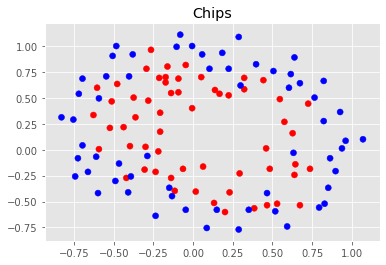

CPU times: user 485 ms, sys: 57.2 ms, total: 543 ms
Wall time: 6.06 s
Лучшие параметры: {'n_estimators': 7, 'random_state': 15}
Accuracy:         77.12%


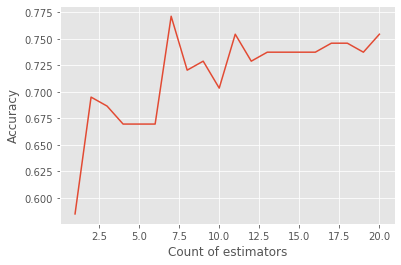

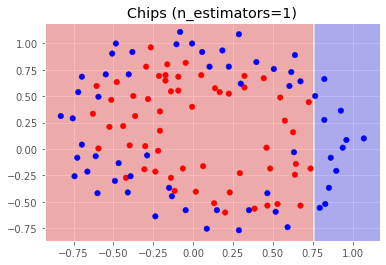

Chips (n_estimators=1)
Accuracy: 59.32%
F1-score: 70.73%
R2-score: -345.28%
SMAPE   : 81.36%


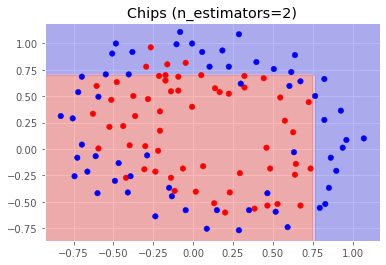

Chips (n_estimators=2)
Accuracy: 70.34%
F1-score: 75.52%
R2-score: -47.24%
SMAPE   : 59.32%


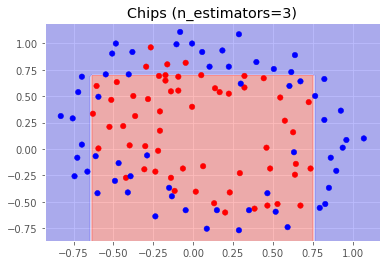

Chips (n_estimators=3)
Accuracy: 77.12%
F1-score: 80.00%
R2-score: -0.92%
SMAPE   : 45.76%


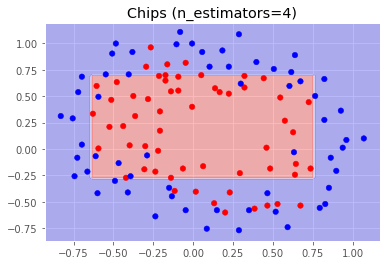

Chips (n_estimators=4)
Accuracy: 81.36%
F1-score: 80.36%
R2-score: 24.88%
SMAPE   : 37.29%


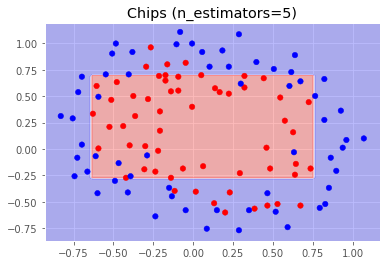

Chips (n_estimators=5)
Accuracy: 81.36%
F1-score: 80.36%
R2-score: 24.88%
SMAPE   : 37.29%


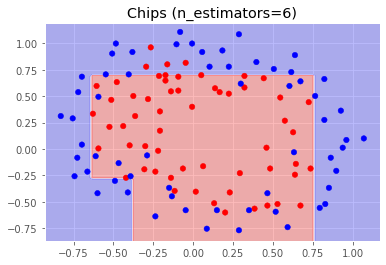

Chips (n_estimators=6)
Accuracy: 79.66%
F1-score: 81.82%
R2-score: 13.02%
SMAPE   : 40.68%


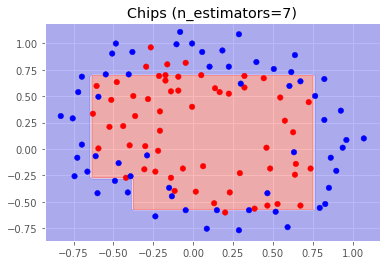

Chips (n_estimators=7)
Accuracy: 85.59%
F1-score: 86.18%
R2-score: 41.77%
SMAPE   : 28.81%


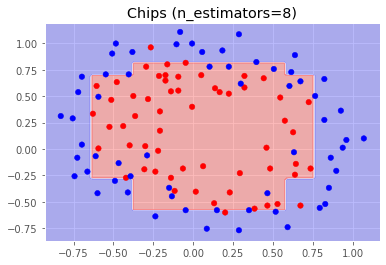

Chips (n_estimators=8)
Accuracy: 84.75%
F1-score: 85.94%
R2-score: 36.79%
SMAPE   : 30.51%


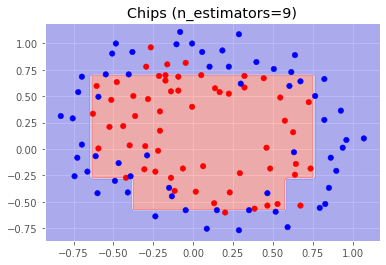

Chips (n_estimators=9)
Accuracy: 84.75%
F1-score: 85.25%
R2-score: 38.54%
SMAPE   : 30.51%


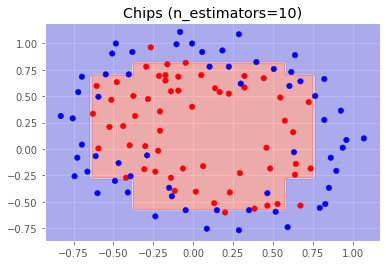

Chips (n_estimators=10)
Accuracy: 84.75%
F1-score: 85.94%
R2-score: 36.79%
SMAPE   : 30.51%


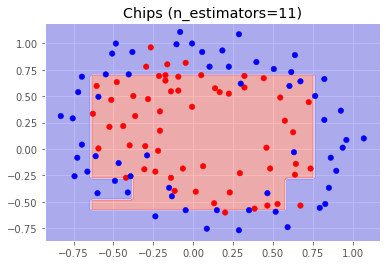

Chips (n_estimators=11)
Accuracy: 84.75%
F1-score: 85.25%
R2-score: 38.54%
SMAPE   : 30.51%


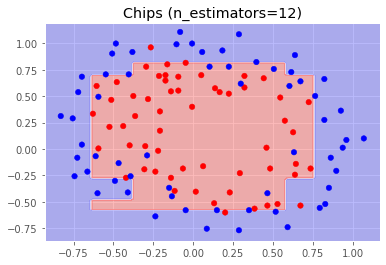

Chips (n_estimators=12)
Accuracy: 84.75%
F1-score: 85.94%
R2-score: 36.79%
SMAPE   : 30.51%


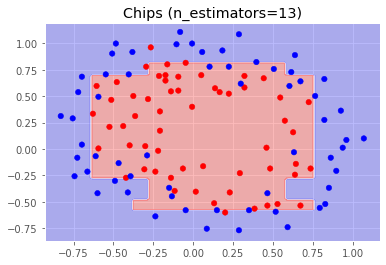

Chips (n_estimators=13)
Accuracy: 84.75%
F1-score: 85.94%
R2-score: 36.79%
SMAPE   : 30.51%


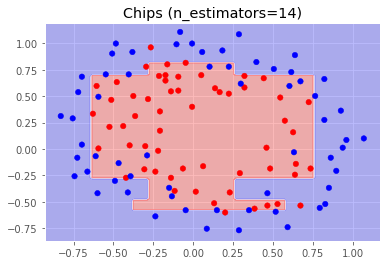

Chips (n_estimators=14)
Accuracy: 85.59%
F1-score: 86.40%
R2-score: 41.29%
SMAPE   : 28.81%


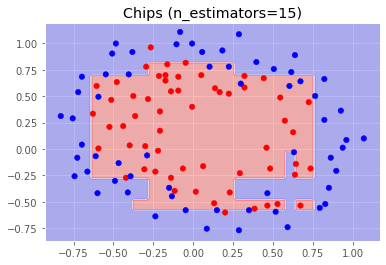

Chips (n_estimators=15)
Accuracy: 87.29%
F1-score: 88.00%
R2-score: 48.20%
SMAPE   : 25.42%


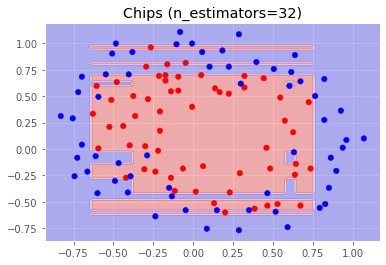

Chips (n_estimators=32)
Accuracy: 92.37%
F1-score: 92.56%
R2-score: 69.35%
SMAPE   : 15.25%


In [8]:
report(grid_param, chips, 15, 'Chips')

## 2. Датасет "Geyser"

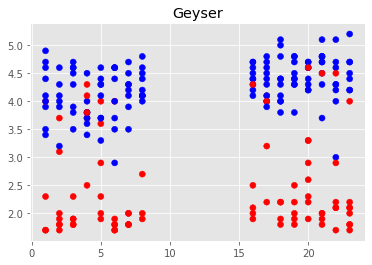

CPU times: user 903 ms, sys: 20.6 ms, total: 924 ms
Wall time: 10.4 s
Лучшие параметры: {'n_estimators': 11, 'random_state': 15}
Accuracy:         88.74%


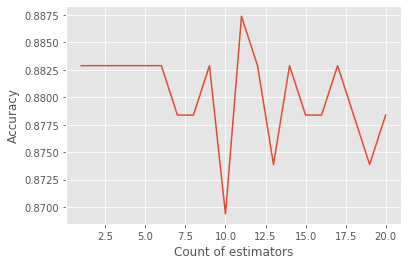

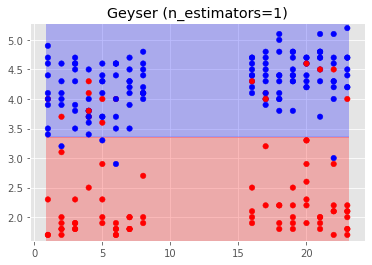

Geyser (n_estimators=1)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


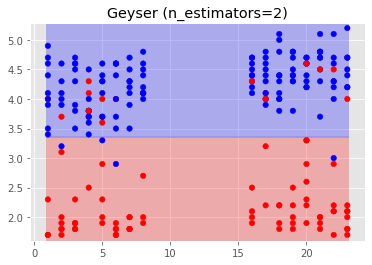

Geyser (n_estimators=2)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


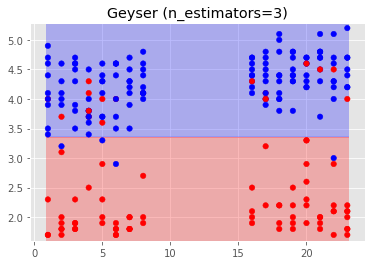

Geyser (n_estimators=3)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


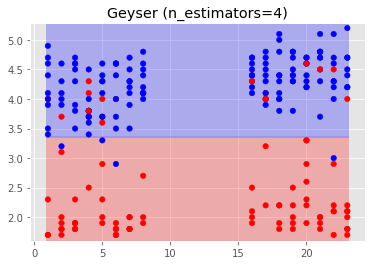

Geyser (n_estimators=4)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


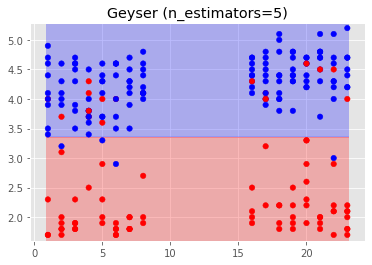

Geyser (n_estimators=5)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


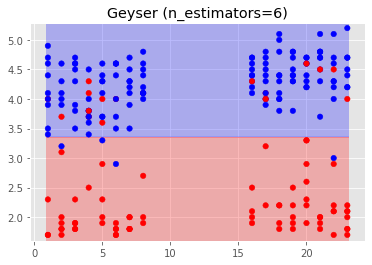

Geyser (n_estimators=6)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


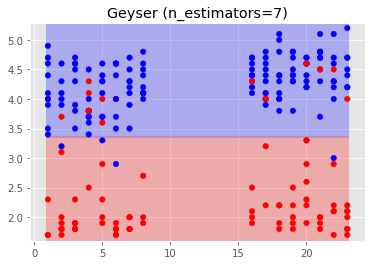

Geyser (n_estimators=7)
Accuracy: 90.09%
F1-score: 86.42%
R2-score: 55.41%
SMAPE   : 19.82%


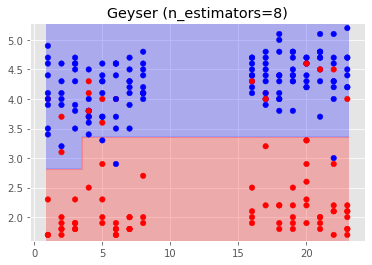

Geyser (n_estimators=8)
Accuracy: 90.09%
F1-score: 86.25%
R2-score: 54.78%
SMAPE   : 19.82%


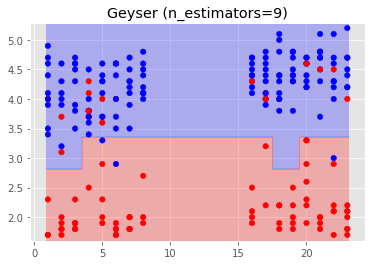

Geyser (n_estimators=9)
Accuracy: 90.09%
F1-score: 86.25%
R2-score: 54.78%
SMAPE   : 19.82%


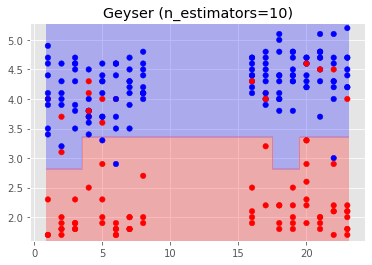

Geyser (n_estimators=10)
Accuracy: 90.09%
F1-score: 86.25%
R2-score: 54.78%
SMAPE   : 19.82%


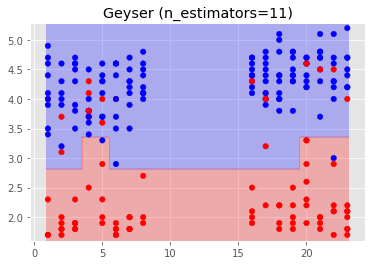

Geyser (n_estimators=11)
Accuracy: 90.09%
F1-score: 86.08%
R2-score: 54.10%
SMAPE   : 19.82%


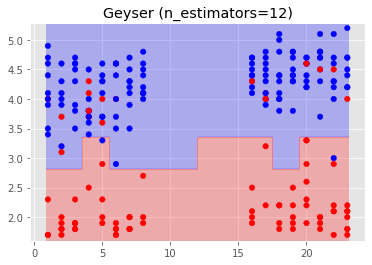

Geyser (n_estimators=12)
Accuracy: 90.54%
F1-score: 86.79%
R2-score: 56.52%
SMAPE   : 18.92%


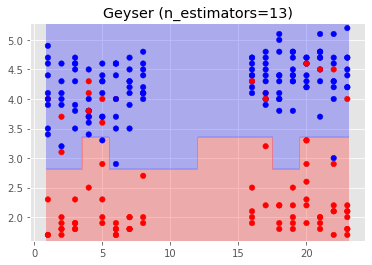

Geyser (n_estimators=13)
Accuracy: 90.54%
F1-score: 86.79%
R2-score: 56.52%
SMAPE   : 18.92%


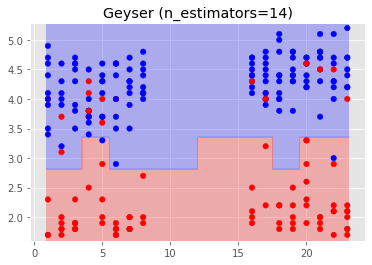

Geyser (n_estimators=14)
Accuracy: 90.54%
F1-score: 86.79%
R2-score: 56.52%
SMAPE   : 18.92%


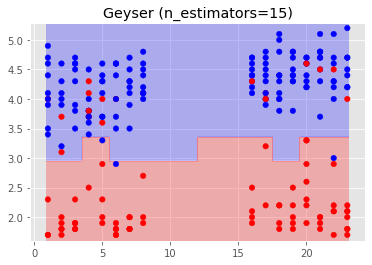

Geyser (n_estimators=15)
Accuracy: 90.09%
F1-score: 86.25%
R2-score: 54.78%
SMAPE   : 19.82%


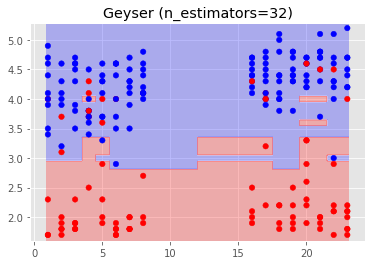

Geyser (n_estimators=32)
Accuracy: 90.54%
F1-score: 86.79%
R2-score: 56.52%
SMAPE   : 18.92%


In [9]:
report(grid_param, geyser, 15, 'Geyser')